In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib
import seaborn as sns
import glob
import sys
sys.path.append("../../utils")
from is_pareto_efficient import is_pareto_efficient

plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath,bm}')
matplotlib.rcParams.update({'font.size': 14})
#import matplotlib.style as style
#style.use('tableau-colorblind10')

# colorblind colors
colors = ['#377eb8', '#ff7f00', '#4daf4a',
          '#f781bf', '#a65628', '#984ea3',
          '#999999', '#e41a1c', '#dede00']
markers = ['o','s','^']
# # colorblind colors
# from matplotlib.colors import ListedColormap
# cmap = ListedColormap(sns.color_palette("colorblind",256))
# colors = cmap(np.linspace(0,1,len(ncoils_unique)))


# import sys
# !{sys.executable} -m pip install simsopt

In [2]:
filelist = glob.glob("./output/biobjective/length/biobjective_eps_con_length_*.pickle")

In [3]:
Fopt_list = []
constraint_targets = []
ncoils = []
for ff in filelist:
    indata = pickle.load(open(ff,"rb"))
    Fopt_list.append(indata['Fopt'])
    constraint_targets.append(indata['constraint_target'])
    ncoils.append(indata['ncoils'])
Fopt_list = np.array(Fopt_list)
constraint_targets = np.array(constraint_targets)
ncoils = np.array(ncoils)

In [4]:
surf_minor_radius = 0.16831206437162438
surf_effective_circumference = 2*np.pi*surf_minor_radius

In [5]:
# filter out points with small/large average coil length
idx_filter = (Fopt_list[:,1]/ncoils > 2) & (Fopt_list[:,1]/ncoils < 8)
Fopt_list = Fopt_list[idx_filter]
constraint_targets = constraint_targets[idx_filter]
ncoils = ncoils[idx_filter]

# filter out points with 5 coils
idx_filter = ncoils != 5
Fopt_list = Fopt_list[idx_filter]
constraint_targets = constraint_targets[idx_filter]
ncoils = ncoils[idx_filter]

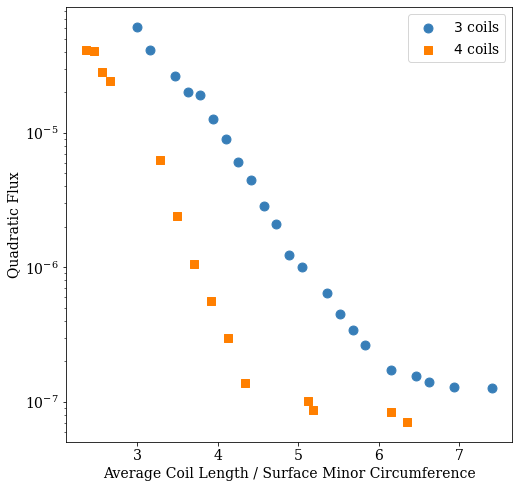

In [6]:
fig = plt.figure(figsize=(8,8))
ncoils_unique = np.unique(ncoils)


# get the Pareto set
for ii,nn in enumerate(ncoils_unique):
    # find the pareto set for this number of coils
    idx_nn = ncoils == nn
    idx_pareto = is_pareto_efficient(Fopt_list[idx_nn])
    F_pareto = Fopt_list[idx_nn][idx_pareto]
    
    # plot samples
#     plt.scatter(Fopt_list[idx_nn,1]/nn/surf_effective_circumference,Fopt_list[idx_nn,0],color=colors[ii],marker='o',s=15,label='Samples, $n_c = %d$'%nn)

    # plot pareto for total coil length
#     plt.scatter(F_pareto[:,1],F_pareto[:,0],color=colors[ii],marker=markers[ii],s=80,label='$n_c = %d$'%nn)

    # plot pareto for average coil length
#     plt.scatter(F_pareto[:,1],F_pareto[:,0],color=colors[ii],marker=markers[ii],s=80,label='$n_c = %d$'%nn)
    plt.scatter(F_pareto[:,1]/nn/surf_effective_circumference,F_pareto[:,0],color=colors[ii],marker=markers[ii],s=80,label='$%d$ coils'%nn)

plt.ylabel('Quadratic Flux')
plt.xlabel("Average Coil Length / Surface Minor Circumference")
plt.yscale('log')
plt.legend(loc='upper right')
# plt.xlim(20,30)